In [1]:
require(data.table)
require(pbapply)
pboptions(type="timer")

source("functions/plot_scatterplot_with_density_snr_value.R")

Loading required package: data.table

Loading required package: pbapply

Loading required package: cowplot

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: ggforce

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [2]:
nthreads=10

In [3]:
dots_data0 = readRDS(file.path("/mnt/data/Imaging/202105-Deconwolf/data_210726",
                              "dots_data.rds"))[is.finite(SNR2) & SNR2 > 0 & Value2 > 0]
nuclear_features = fread("../data/selected_nuclei.tsv", key=c("sid", "nid"))

In [4]:
dots_data = rbindlist(pblapply(split(dots_data0, list(dots_data0$image_type, dots_data0$magnification)), function(subdata, nuclear_features) {
    setkeyv(subdata, c("series_id", "nid"))
    return(nuclear_features[subdata][!is.na(size)])
}, nuclear_features))
setnames(dots_data, "sid", "series_id")

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=07s  


# Panel X1.a
Scatterplot of Value (Y) and SNR (X) for 60x.dw, fields 2-7. Density of Value on the side of Y panel.

In [5]:
thr_data = fread("../data/60x_reference/intensity_thresholds.by_field.tsv")[image_type == "dw"]

In [6]:
plist = pblapply(2:7, function(field_id, thr_data) {
    p = plot_scatterplot_with_density_snr_value(
        dots_data, nuclear_features, "60x", "dw",
        field_id, thr_data[sid == field_id, thr],
        c(-1, 1, 3, 5))
}, thr_data)

  |                                                  | 0 % ~calculating  

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++                                         | 17% ~26s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++++++++++                                 | 33% ~18s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++++++++++++++++++                         | 50% ~12s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++                | 67% ~08s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++++++++++        | 83% ~04s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=22s  


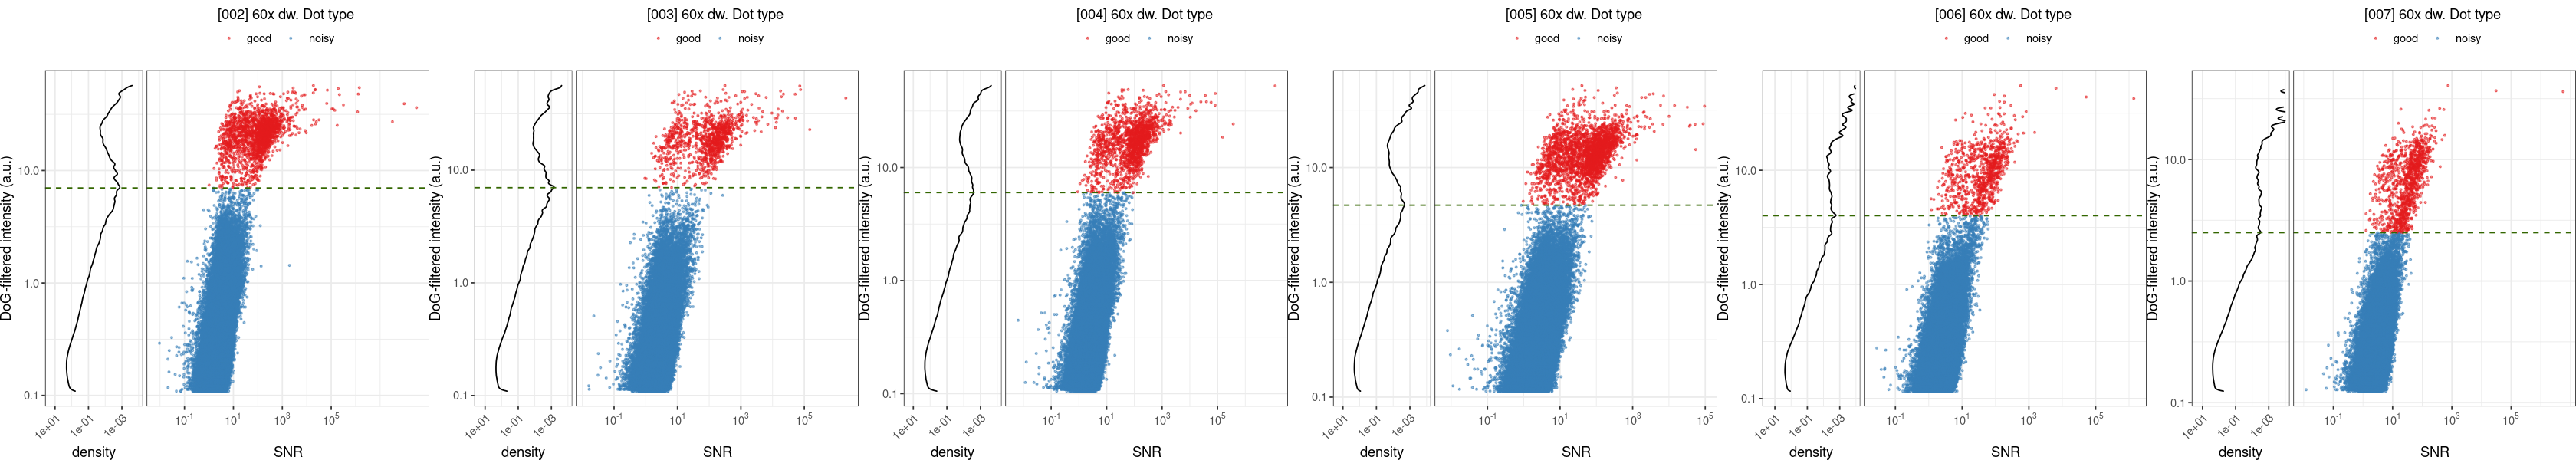

In [7]:
options(repr.plot.width=28, repr.plot.height=5)
p = plot_grid(plotlist=plist, nrow=1)
print(p)

In [8]:
ggsave(plot=p, file="panels/fig_x1a.png", width=21, height=4)
l = pblapply(1:length(plist), function(panel_id) {
    saveRDS(plist[[panel_id]], sprintf("panels_rds/supp_fig_x1a.%01d.rds", panel_id))
})

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=16s  


# Panel X1.b
Scatterplot of Value (Y) and SNR (X) for 60x.raw, fields 2-7. Density of Value on the side of Y panel.

In [9]:
thr_data = fread("../data/60x_reference/intensity_thresholds.by_field.tsv")[image_type == "raw"]

In [10]:
plist = pblapply(2:7, function(field_id, thr_data) {
    p = plot_scatterplot_with_density_snr_value(
        dots_data, nuclear_features, "60x", "raw",
        field_id, thr_data[sid == field_id, thr],
        c(-3, -1, 1), c(.017, 1))
}, thr_data)

  |                                                  | 0 % ~calculating  

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++                                         | 17% ~18s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++++++++++                                 | 33% ~13s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++++++++++++++++++                         | 50% ~09s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++                | 67% ~06s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++++++++++        | 83% ~03s          

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=20s  


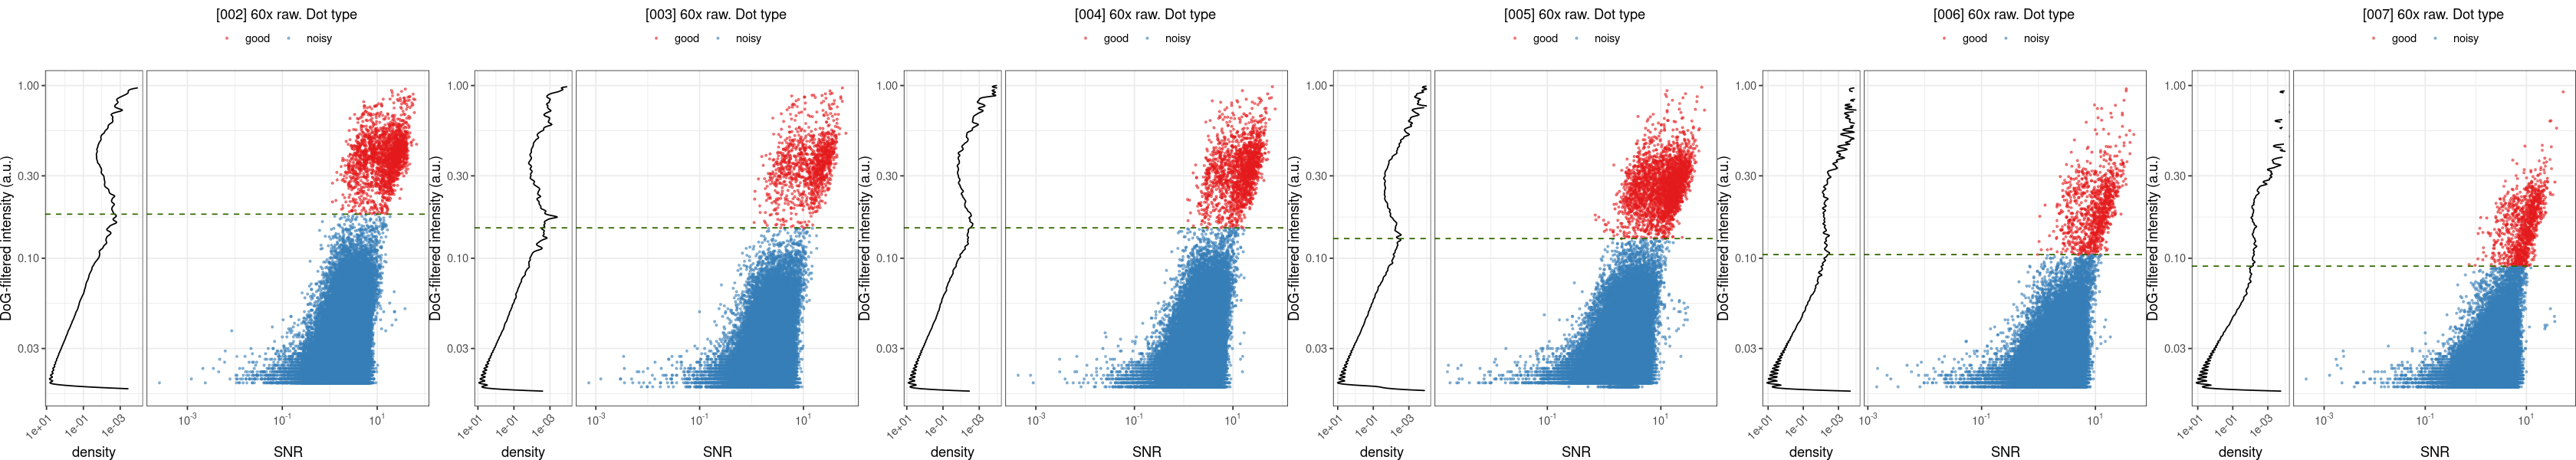

In [11]:
options(repr.plot.width=28, repr.plot.height=5)
p = plot_grid(plotlist=plist, nrow=1)
print(p)

In [12]:
ggsave(plot=p, file="panels/fig_x1b.png", width=21, height=4)
l = pblapply(1:length(plist), function(panel_id) {
    saveRDS(plist[[panel_id]], sprintf("panels_rds/supp_fig_x1b.%01d.rds", panel_id))
})

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=20s  


# Panel X1.c
Scatterplot of Value (Y) and SNR (X) for 20x.raw, fields 2-7. Density of Value on the side of Y panel.

In [5]:
thr_data = fread("../data/magnifications_matching/intensity_thresholds.by_field.tsv")[image_type == "raw"]

In [6]:
plist = pblapply(2:7, function(field_id, thr_data) {
    p = plot_scatterplot_with_density_snr_value(
        dots_data, nuclear_features, "20x", "raw",
        field_id, thr_data[sid == field_id, thr],
        c(-3, -1, 1), c(.02, 1))
}, thr_data)

  |                                                  | 0 % ~calculating  

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++                                         | 17% ~26s          

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


  |+++++++++++++++++                                 | 33% ~19s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |+++++++++++++++++++++++++                         | 50% ~14s          

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



  |++++++++++++++++++++++++++++++++++                | 67% ~09s          

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


  |++++++++++++++++++++++++++++++++++++++++++        | 83% ~04s          

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=26s  


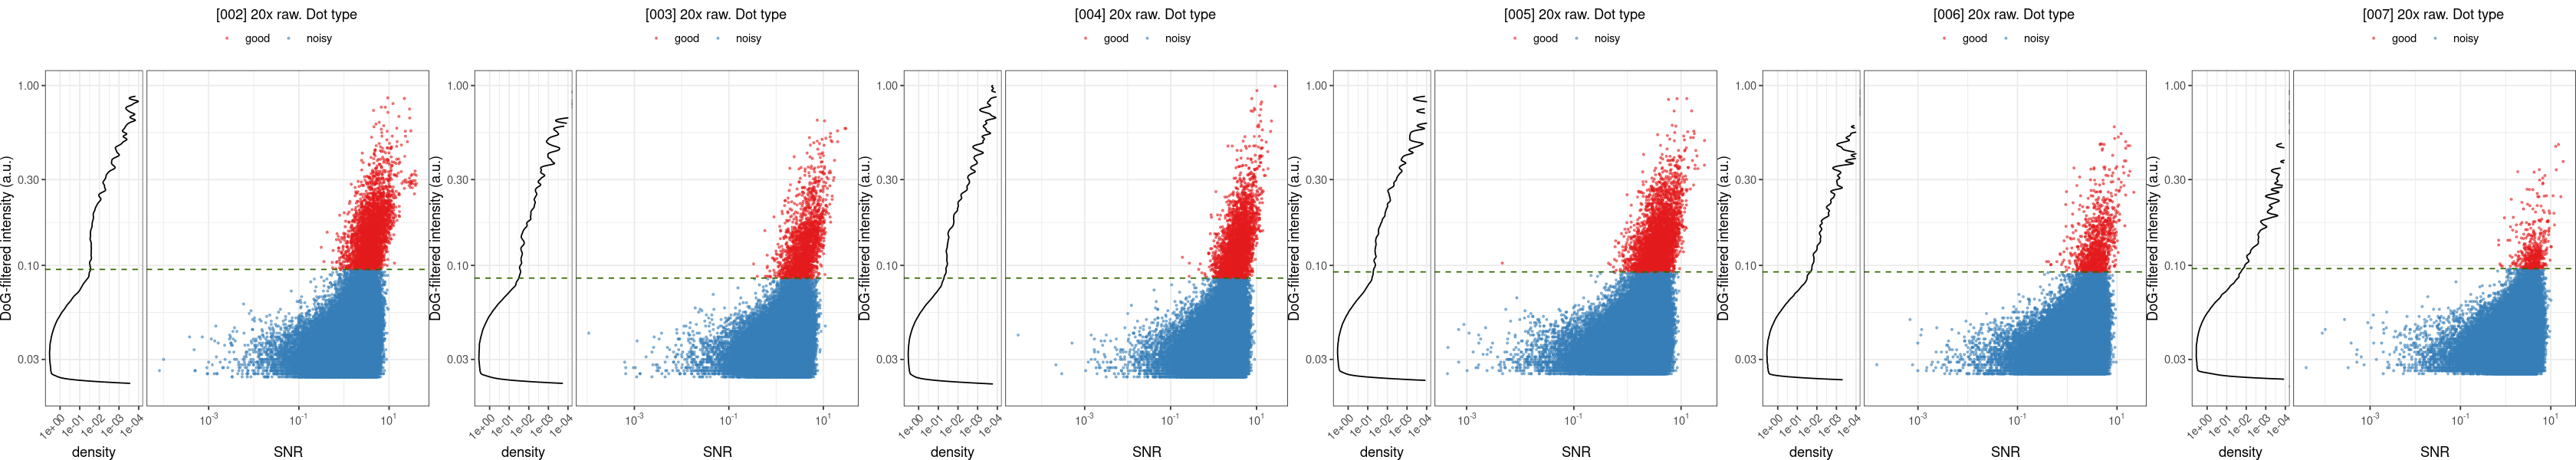

In [7]:
options(repr.plot.width=28, repr.plot.height=5)
p = plot_grid(plotlist=plist, nrow=1)
print(p)

In [8]:
ggsave(plot=p, file="panels/fig_x1c.png", width=21, height=4)
l = pblapply(1:length(plist), function(panel_id) {
    saveRDS(plist[[panel_id]], sprintf("panels_rds/supp_fig_x1c.%01d.rds", panel_id))
})

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=15s  


# Panel X1.d
Scatterplot of Value (Y) and SNR (X) for 20x.dw, fields 2-7. Density of Value on the side of Y panel.

In [9]:
thr_data = fread("../data/magnifications_matching/intensity_thresholds.by_field.tsv")[image_type == "dw"]

In [10]:
plist = pblapply(2:7, function(field_id, thr_data) {
    p = plot_scatterplot_with_density_snr_value(
        dots_data, nuclear_features, "20x", "dw",
        field_id, thr_data[sid == field_id, thr],
        c(-3, -1, 1), c(.1, 100))
}, thr_data)

  |                                                  | 0 % ~calculating  

Warning message:
“Removed 89 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 89 rows containing non-finite values (stat_density).”
Warning message:
“Removed 89 rows containing missing values (geom_point).”


  |+++++++++                                         | 17% ~21s          

Warning message:
“Removed 36 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 36 rows containing non-finite values (stat_density).”
Warning message:
“Removed 36 rows containing missing values (geom_point).”


  |+++++++++++++++++                                 | 33% ~14s          

Warning message:
“Removed 63 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 63 rows containing non-finite values (stat_density).”
Warning message:
“Removed 63 rows containing missing values (geom_point).”


  |+++++++++++++++++++++++++                         | 50% ~10s          

Warning message:
“Removed 41 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 41 rows containing non-finite values (stat_density).”
Warning message:
“Removed 41 rows containing missing values (geom_point).”


  |++++++++++++++++++++++++++++++++++                | 67% ~07s          

Warning message:
“Removed 32 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 32 rows containing non-finite values (stat_density).”
Warning message:
“Removed 32 rows containing missing values (geom_point).”


  |++++++++++++++++++++++++++++++++++++++++++        | 83% ~03s          

Warning message:
“Removed 20 rows containing non-finite values (stat_density).”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 20 rows containing non-finite values (stat_density).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=20s  


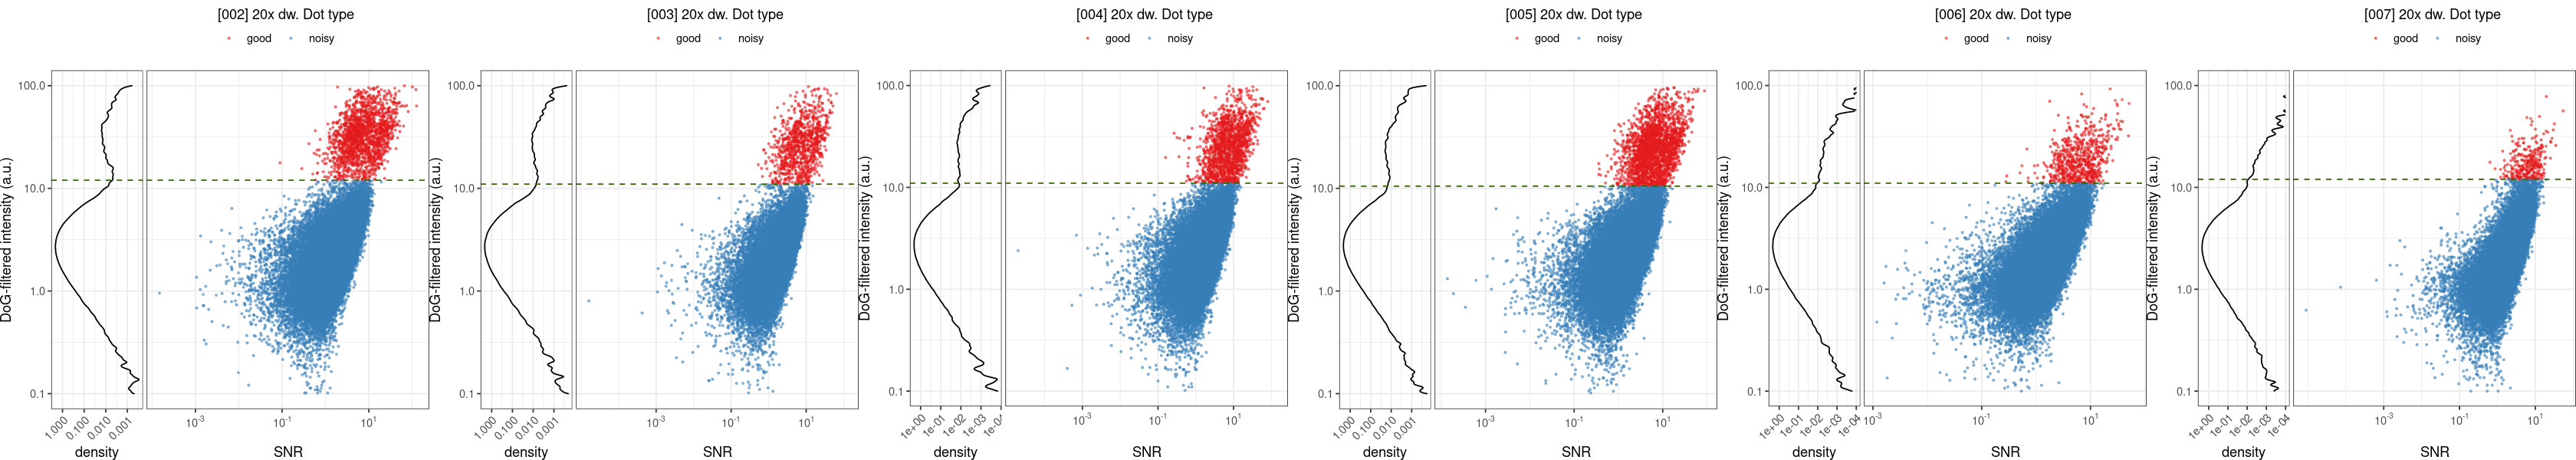

In [11]:
options(repr.plot.width=28, repr.plot.height=5)
p = plot_grid(plotlist=plist, nrow=1)
print(p)

In [12]:
ggsave(plot=p, file="panels/fig_x1d.png", width=21, height=4)
l = pblapply(1:length(plist), function(panel_id) {
    saveRDS(plist[[panel_id]], sprintf("panels_rds/supp_fig_x1d.%01d.rds", panel_id))
})

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=12s  
